In [2]:
import pandas as pd
import pickle
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import re
import warnings
import operator
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy import stats
from itertools import cycle, islice


In [3]:
pd.options.mode.chained_assignment = None 
# df = pd.read_csv('data/df_out.csv'), dtype={'price':float, 'year':"Int64"}
df = pd.read_csv('db_sales.csv')
# pd.to_datetime(df_hits['hit_date'], utc=False)
df

,Order_ID,Приоритет,Количество,Выручка,Метод доставки,Прибыль,Покупатель,Регион,Продукт,Упаковка продукта
0,643,High,21,"2 781,82",Express Air,"-695,26",Monica Federle,Nunavut,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,"3 389,93",Express Air,"737,94",Beth Paige,Northwest Territories,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,"2 039,56",Express Air,"-329,49",Bryan Davis,Northwest Territories,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,"905,94",Express Air,"-4,19",Carlos Daly,Northwest Territories,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,"1 168,15",Express Air,"-743,96",Muhammed MacIntyre,Northwest Territories,Tennsco Industrial Shelving,Large Box
...,...,...,...,...,...,...,...,...,...,...
725,56101,Not Specified,44,"5 347,13",Regular Air,"1 886,41",Bill Donatelli,Ontario,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,"127,33",Regular Air,"5,00",Sean O'Donnell,Ontario,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,"990,10",Regular Air,"310,22",Sean O'Donnell,Ontario,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,"28,32",Regular Air,"-14,35",Susan Vittorini,Ontario,"Hammermill CopyPlus Copy Paper (20Lb, and 84 B...",Small Box


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order_ID           730 non-null    int64 
 1   Приоритет          730 non-null    object
 2   Количество         730 non-null    int64 
 3   Выручка            730 non-null    object
 4   Метод доставки     730 non-null    object
 5   Прибыль            730 non-null    object
 6   Покупатель         730 non-null    object
 7   Регион             730 non-null    object
 8   Продукт            730 non-null    object
 9   Упаковка продукта  730 non-null    object
dtypes: int64(2), object(8)
memory usage: 57.2+ KB


<AxesSubplot: >

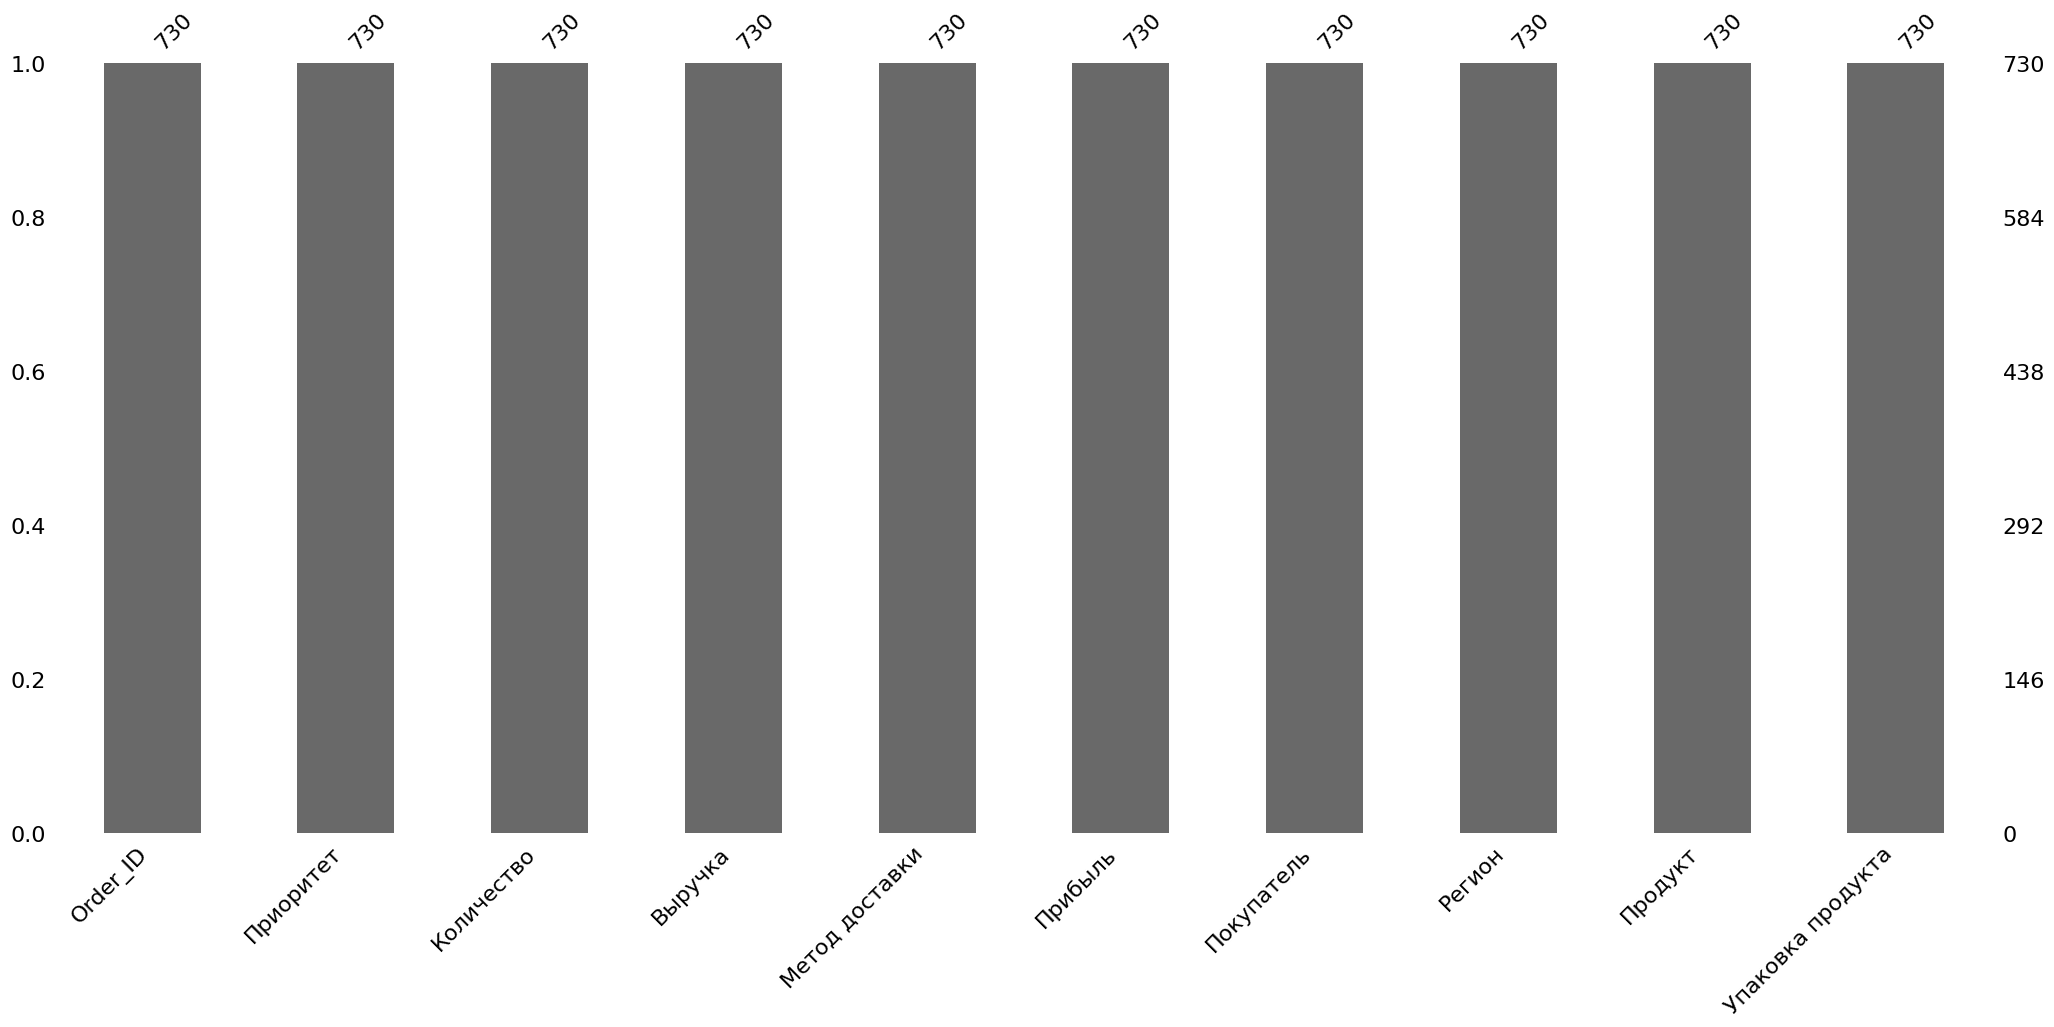

In [5]:
msno.bar(df)